## np.meshgrid 에 대한 이해

In [3]:
import numpy as np

In [4]:
x= np.arange(3)
y= np.arange(4)

In [5]:
# 앞에 오는 x_는  x를 수직확장
x_, y_ = np.meshgrid(x,y)
x_

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [6]:
x_.shape

(4, 3)

In [7]:
#뒤에 오는 y_는  y를 수평 확장
y_

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# load the iris dataset
iris = load_iris()

# select the first two features (sepal length and sepal width)
X = iris.data[:, :2]
print(iris.feature_names[:2])
y = iris.target
print(np.unique(y))
print(iris.target_names)


['sepal length (cm)', 'sepal width (cm)']
[0 1 2]
['setosa' 'versicolor' 'virginica']


### logisticRegression은 분류 모델이다.
#### 그래서 fit 할 때 입력변수는 X,y 둘다 제공해야함. 타겟까지 학습을 시켜야 얘가 나중에 분류를 하니까

In [9]:
# fit a logistic regression model to the data
#분류기 생성
# target까지 학습을 시켜야 이따 분류기가 분류를 잘한다.

clf = LogisticRegression(random_state=0).fit(X, y)




### xx는 np.arange(x_min, x_max, h)를  np.arange(y_min, y_max,h)만큼 수직확장

In [25]:
# define a meshgrid to plot the decision boundary
# h는 meshgrid 격자선 만들 때 선 간격 0.02 , 이것보다 큰 값을 제공하면 뒤에 matplotlib로 그릴 때 삐뚤삐뚤하게 그려진다.
# 최소값에 -0.5 최대값에 +0.5를 (버퍼를 넣어서) 그림의 중앙을 맞춘다.
h = 0.02 
x_min, x_max = X[:, 0].min() -0.5 , X[:, 0].max() +0.5
y_min, y_max = X[:, 1].min() -0.5, X[:, 1].max()+0.5 

## xx는 2차원 배열의 x좌표를 포함한 (171, 231)의 행렬 yy는 2차원 배열의 y좌표를 포함한 (171,231 )의 행렬
# np.meshgrid / np.c_[xx.ravel(), yy.ravel()]은 세트
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

np.c_ 예시

In [24]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [12]:
# 격자선 안에 들어갈 (x,y)좌표들 39501 개의 쌍의 좌표는 격자선을 구성한다.
# 후에 각 좌표는 predict에 넣어서 예측값으로 이루어진 그림을 그리는데 쓰인다.
# shape는 (39501,2)

np.c_[xx.ravel(), yy.ravel()]


array([[3.8 , 1.5 ],
       [3.82, 1.5 ],
       [3.84, 1.5 ],
       ...,
       [8.36, 4.9 ],
       [8.38, 4.9 ],
       [8.4 , 4.9 ]])

In [15]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z.shape)

(39501,)


In [23]:
# xx와 yy와 Z랑 shape가 일치해야 후에 pcolormesh 에서 오류가 발생하지 않는다.
Z = Z.reshape(xx.shape)
(xx,yy,Z)


(array([[3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        ...,
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ]]),
 array([[1.5 , 1.5 , 1.5 , ..., 1.5 , 1.5 , 1.5 ],
        [1.52, 1.52, 1.52, ..., 1.52, 1.52, 1.52],
        [1.54, 1.54, 1.54, ..., 1.54, 1.54, 1.54],
        ...,
        [4.86, 4.86, 4.86, ..., 4.86, 4.86, 4.86],
        [4.88, 4.88, 4.88, ..., 4.88, 4.88, 4.88],
        [4.9 , 4.9 , 4.9 , ..., 4.9 , 4.9 , 4.9 ]]),
 array([[1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        ...,
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2]]))

## pcolormesh로 구분선(decision boundary)를 그리자

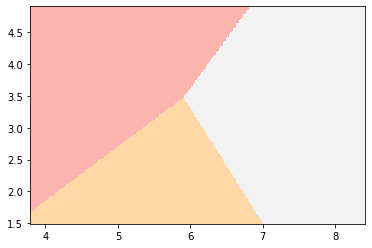

In [26]:
# predict의 결과로 나온건 1차원 벡터니 이를 XX의 크기로 reshape해준다.
#각 격자선의 점마다 predict의 결과가 담긴 Z가 대응된다. 타겟 값에 대응하는 영역이 만들어진다.



# plot the decision boundary and the data points
plt.figure(figsize=(6, 4))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)
plt.show()

## *  코드 분해하기

###### figure로 그래프 그릴 크기 설정
###### pcolormesh로 Z(예측값)을 담아 구분선 그림 그리기
###### scatter로 실제 값(y)을 담아 scatterplot 그리기
###### 각 x축,y축 이름 붙이고 최소 최대 범위 잡기
######  칼라바를 만들어서 각 분류가 어떤 것인지 알게 하기 0,1,2에 대응하는게 뭔지 알거아냐
######  마지막에 plt.show()로 보게 하기

setosa
versicolor
virginica


C:\Users\82109\AppData\Local\Temp/ipykernel_2420/485308032.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y==i, 0], X[y==i, 1], label=name, cmap=plt.cm.Pastel1)


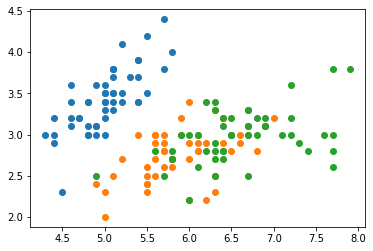

In [29]:
# 실제 데이터 이름 붙이고 점찍기 
for i, name in enumerate(iris.target_names):
    print(name)
    plt.scatter(X[y==i, 0], X[y==i, 1], label=name, cmap=plt.cm.Pastel1)

C:\Users\82109\AppData\Local\Temp/ipykernel_2420/2700406405.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y==i, 0], X[y==i, 1], label=name, cmap=plt.cm.Pastel1)


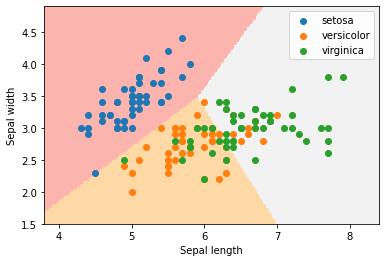

In [22]:
plt.figure(1, figsize=(6, 4))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

# enumerate 함수를 지정해서 라벨에 이름을 달아준다.
for i, name in enumerate(iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], label=name, cmap=plt.cm.Pastel1)

#축 이름 설정    
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

#축 범위 설정
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# 축에 눈금 매기기
plt.xticks()
plt.yticks()

#위에 enumerate에서 달아준 라벨을 기준으로 범례를 만들어준다.
plt.legend()


plt.show()